In [127]:
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("column_3C.dat", sep = " ", header = None)
df

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [128]:
x = df.iloc[:,:-1]
y = df.iloc[:,6]
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)

# Random Forest Classifier

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 500)

In [130]:
for i in range(1, 11):
    clf = RandomForestClassifier(n_estimators = i*100, random_state = 500)
    clf = clf.fit(X_train, Y_train)
    prd = clf.predict(X_test)
    print(f"No.{i} accuracy: {accuracy_score(Y_test, prd)}")

No.1 accuracy: 0.8602150537634409
No.2 accuracy: 0.8817204301075269
No.3 accuracy: 0.8709677419354839
No.4 accuracy: 0.8709677419354839
No.5 accuracy: 0.8817204301075269
No.6 accuracy: 0.8924731182795699
No.7 accuracy: 0.8924731182795699
No.8 accuracy: 0.8924731182795699
No.9 accuracy: 0.8924731182795699
No.10 accuracy: 0.8924731182795699


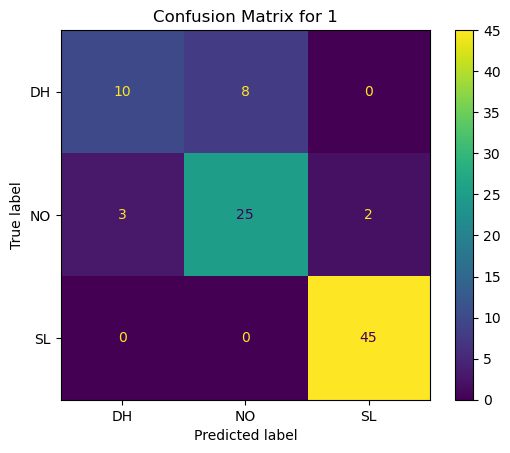

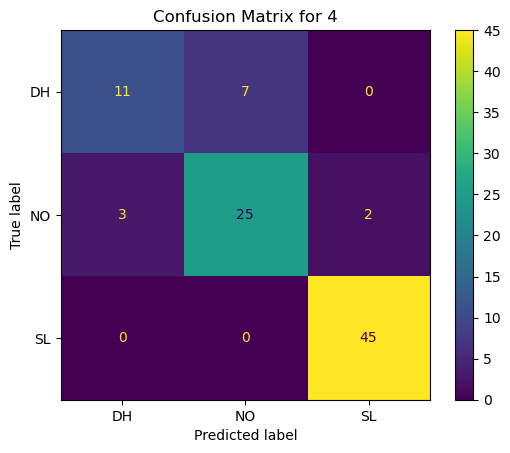

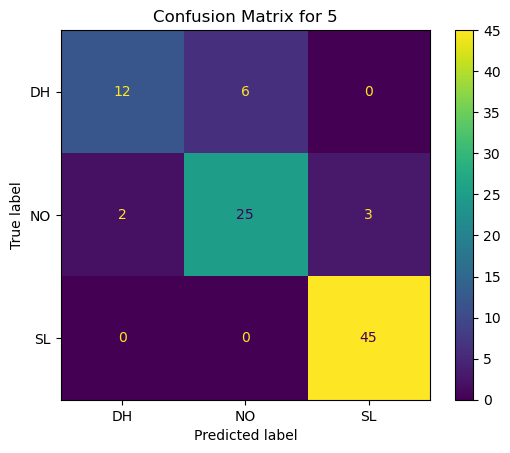

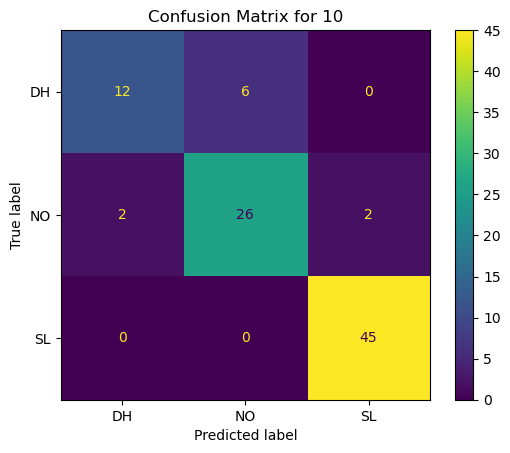

In [131]:
clf_arr = [100, 400, 500, 1000]
for rfc in clf_arr:
    clf1 = RandomForestClassifier(n_estimators = rfc, random_state = 500)
    clf1 = clf1.fit(X_train, Y_train)
    prd1 = clf1.predict(X_test)
    cm = confusion_matrix(Y_test, prd1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
    disp.plot()
    disp.ax_.set_title(f"Confusion Matrix for {int(rfc/100)}")
    plt.show()

# Componet Decision Trees

In [132]:
def mapping(x):
    if x == 0.0: return "NO"
    elif x == 1.0: return "DH"
    else: return "SL"

# Get the individual decision trees in the random forest
trees = clf1.estimators_

arr = []

# Evaluate the performance of each decision tree on the test data
for i, tree in enumerate(trees):
    # Get the predictions of the decision tree on the test data
    y_pred_tree = tree.predict(X_test)
    
    # Compare the predictions of the decision tree with that of the original model
    res = map(mapping, y_pred_tree)
    acc = accuracy_score(Y_test, list(res))
    arr.append(acc)

for i in range(0, len(arr), 50):
    print(f"Decision Tree {i} accuracy: {arr[i]:.4f}")

# Evaluate the performance of the original model on the test data
acc = accuracy_score(Y_test, prd1)
print(f"Random Forest accuracy: {acc:.4f}")

Decision Tree 0 accuracy: 0.6237
Decision Tree 50 accuracy: 0.5914
Decision Tree 100 accuracy: 0.5699
Decision Tree 150 accuracy: 0.5699
Decision Tree 200 accuracy: 0.6022
Decision Tree 250 accuracy: 0.6774
Decision Tree 300 accuracy: 0.6129
Decision Tree 350 accuracy: 0.5699
Decision Tree 400 accuracy: 0.6344
Decision Tree 450 accuracy: 0.6022
Decision Tree 500 accuracy: 0.6344
Decision Tree 550 accuracy: 0.5914
Decision Tree 600 accuracy: 0.6452
Decision Tree 650 accuracy: 0.6022
Decision Tree 700 accuracy: 0.6237
Decision Tree 750 accuracy: 0.5484
Decision Tree 800 accuracy: 0.5699
Decision Tree 850 accuracy: 0.5376
Decision Tree 900 accuracy: 0.6237
Decision Tree 950 accuracy: 0.5914
Random Forest accuracy: 0.8925


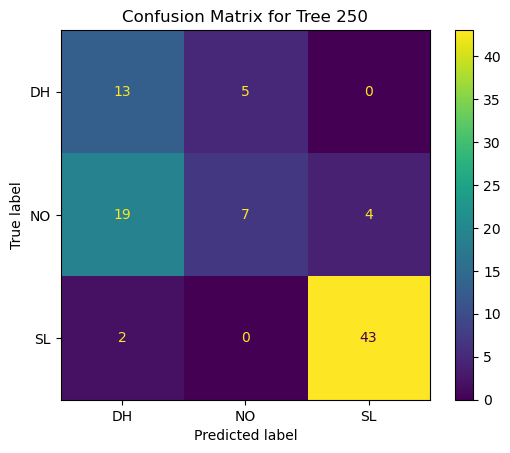

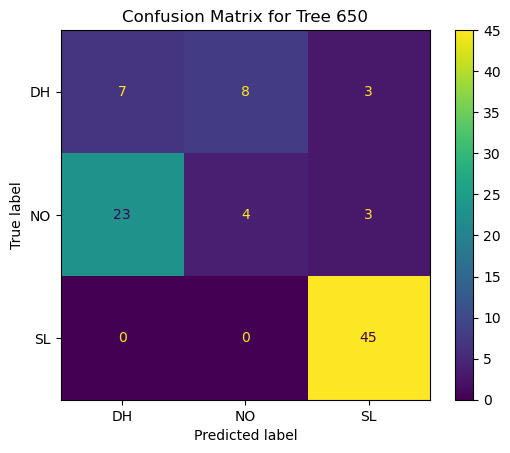

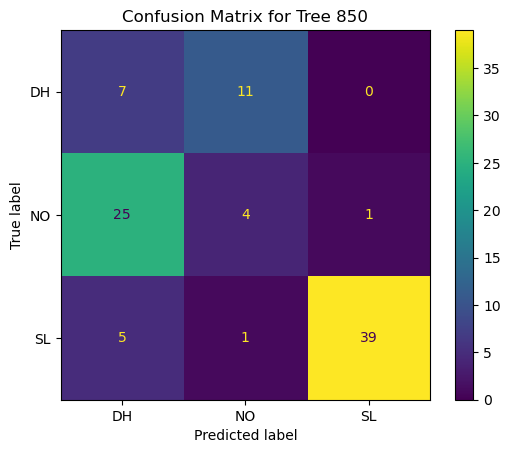

In [133]:
ind_arr = [250, 650, 850]

for i in ind_arr:
    y_pred_tree = trees[i].predict(X_test)
    res = map(mapping, y_pred_tree)
    cm1 = confusion_matrix(Y_test, list(res))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)
    disp.plot()
    disp.ax_.set_title(f"Confusion Matrix for Tree {i}")
    plt.show()

# Features Importances

In [134]:
featureNames = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", 
                "degree spondylolisthesis"]

# Get the feature importances of the random forest model
importances = clf1.feature_importances_

# Print the feature importances
for feature, importance in zip(featureNames, importances):
    print(f"{feature}: {importance:.4f}")

pelvic incidence: 0.1148
pelvic tilt: 0.0943
lumbar lordosis angle: 0.1440
sacral slope: 0.1284
pelvic radius: 0.1125
degree spondylolisthesis: 0.4060


In [135]:
featimp_arr = []

for i in ind_arr:
    imp_arr = []
    importances = trees[i].feature_importances_
    print(f"Decision Tree {i} feature importances:")
    for j, importance in enumerate(importances):
        imp_arr.append(importance)
        print(f"Feature {featureNames[j]}: {importance:.4f}")
    featimp_arr.append(imp_arr)
    print("\n")

Decision Tree 250 feature importances:
Feature pelvic incidence: 0.1223
Feature pelvic tilt: 0.0785
Feature lumbar lordosis angle: 0.2917
Feature sacral slope: 0.1297
Feature pelvic radius: 0.0545
Feature degree spondylolisthesis: 0.3233


Decision Tree 650 feature importances:
Feature pelvic incidence: 0.0462
Feature pelvic tilt: 0.0702
Feature lumbar lordosis angle: 0.0214
Feature sacral slope: 0.1077
Feature pelvic radius: 0.1378
Feature degree spondylolisthesis: 0.6168


Decision Tree 850 feature importances:
Feature pelvic incidence: 0.2525
Feature pelvic tilt: 0.1258
Feature lumbar lordosis angle: 0.0395
Feature sacral slope: 0.1177
Feature pelvic radius: 0.1764
Feature degree spondylolisthesis: 0.2881




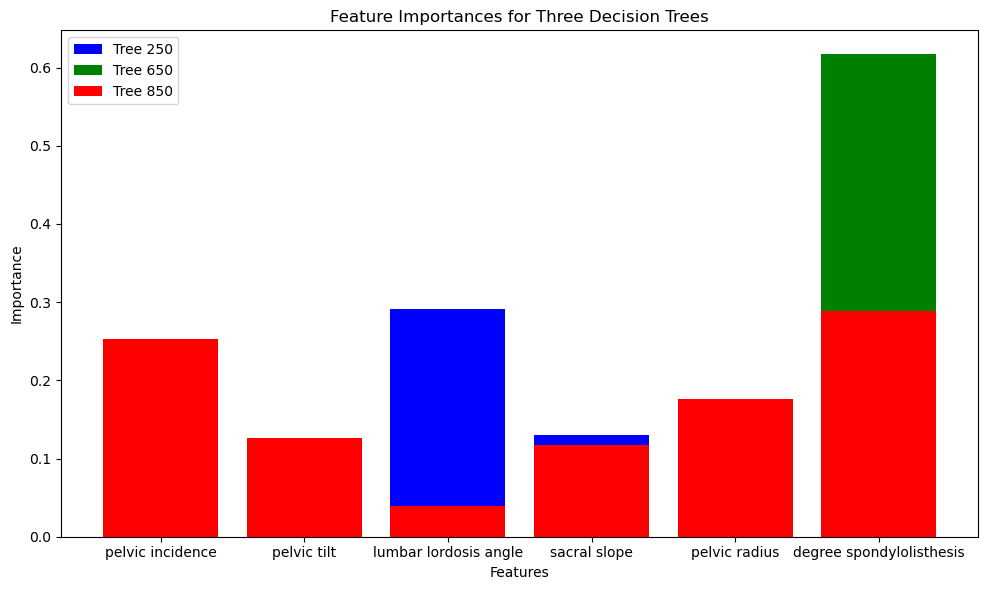

In [136]:
tree_names = ['Tree 250', 'Tree 650', 'Tree 850']

# create the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# set the colors for each tree
colors = ['blue', 'green', 'red']

# plot the feature importances for each tree
for i in range(3):
    ax.bar(featureNames, featimp_arr[i], color=colors[i], alpha=1, label=tree_names[i])

# add a legend and adjust the layout
ax.legend()
ax.set(title='Feature Importances for Three Decision Trees', xlabel='Features', ylabel='Importance')
fig.tight_layout()
plt.show()

# NB Classifier

In [137]:
nb = GaussianNB()
nb = nb.fit(X_train, Y_train)
prediction = nb.predict(X_test)
accuracy_score(Y_test, prediction)

0.8494623655913979

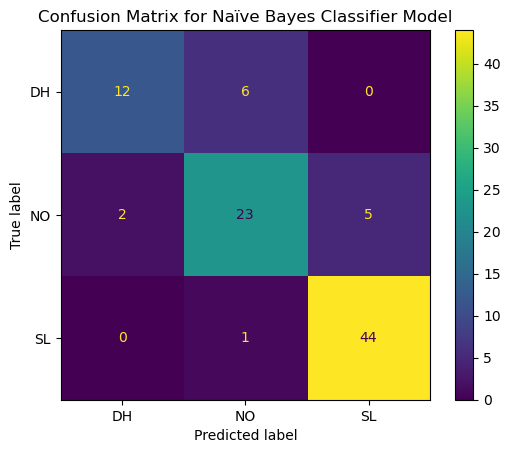

In [138]:
cm2 = confusion_matrix(Y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf1.classes_)
disp.plot()
disp.ax_.set_title(f"Confusion Matrix for Naïve Bayes Classifier Model")
plt.show()